# **데이터 17000개 (하이닥, 지식in)**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.9 MB 5.2 MB/s 
     |████████████████████████████████| 6.6 MB 45.8 MB/s 
     |████████████████████████████████| 163 kB 74.2 MB/s 


In [ ]:
import transformers
transformers.__version__

'4.22.2'

In [ ]:
import pandas as pd
import numpy as np
import urllib.request
import os
from tqdm import tqdm
import tensorflow as tf
from transformers import AutoTokenizer, TFGPT2Model
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/sw전문인재양성프로그램/1차미니프로젝트(질병진단)/중복제거증상찐찐찐최종.csv")
df.head(10)

,symptom,label
0,어제 감기 기운이 있었습니다증상은 콧물 재취기 코막힘과 더불어 입안 양쪽 입볼쪽이 ...,감기
1,한 2주 좀 전부터 감기 걸렸을때처럼 몸살기가 생겨서 없어지지가 않습니다꾸준히 몸이...,감기
2,4시간 전부터 몸이 살짝 으슬으슬하더니 근육통이 올거 같은 느낌이었습니다 2시간 전...,독감
3,4시간 전 으슬으슬한 기운과 근육통이 오는거 같은 기분이었습니다 2시간 전 으슬으슬...,독감
4,14개월 아기입니다 감기기운 발열 콧물 기침 있어 처방받았는데요보통 해열제는 38...,감기
5,지난1주일 약복용후 다나은듯 싶더니 갑자기 열이올라약을 다시 처방받았습니다1일 복용...,감기
6,안녕하세요 약 12달 전 코감기로 고생했습니다 코감기 때문에 왼쪽 귀도 먹먹했었습니...,감기
7,지난주 목감기가래 기침일주일 약복용후 어느정도 나았습니다 어제 점심까지 약 다복용하...,감기
8,이번에 격리되며 갑자기 새벽에 한번씩 호흡이힘들어지고그러다 이번에 하루는 새벽내내 ...,감기
9,목감기 목간질간질 마른기침 두통으로 약 처방받음현재는 두통없고 마른기침만 있음 제가...,감기


In [ ]:
df.loc[(df['label'] == "감기"), 'label'] = 0
df.loc[(df['label'] == "폐렴"), 'label'] = 1
df.loc[(df['label'] == "독감"), 'label'] = 2
df.loc[(df['label'] == "과호흡"), 'label'] = 3
df.loc[(df['label'] == "장염"), 'label'] = 4
df.loc[(df['label'] == "대장염"), 'label'] = 5
df.loc[(df['label'] == "고혈압"), 'label'] = 6
df.loc[(df['label'] == "협심증"), 'label'] = 7
df.loc[(df['label'] == "심근경색"), 'label'] = 8
df.loc[(df['label'] == "공황장애"), 'label'] = 9

In [ ]:
df.head()

,symptom,label
0,어제 감기 기운이 있었습니다증상은 콧물 재취기 코막힘과 더불어 입안 양쪽 입볼쪽이 ...,0
1,한 2주 좀 전부터 감기 걸렸을때처럼 몸살기가 생겨서 없어지지가 않습니다꾸준히 몸이...,0
2,4시간 전부터 몸이 살짝 으슬으슬하더니 근육통이 올거 같은 느낌이었습니다 2시간 전...,2
3,4시간 전 으슬으슬한 기운과 근육통이 오는거 같은 기분이었습니다 2시간 전 으슬으슬...,2
4,14개월 아기입니다 감기기운 발열 콧물 기침 있어 처방받았는데요보통 해열제는 38...,0


In [ ]:
print(df.iloc[0]['symptom'])

어제 감기 기운이 있었습니다증상은 콧물 재취기 코막힘과 더불어 입안 양쪽 입볼쪽이 계속 마르는 느낌이 들어 물이 계속 먹고 싶고어제 오늘 변이 딱딱하게 나와 변이 휴지에 닦이지가 않네요이럴땐 어떻게 해야 하나요 코감기로 나오는 하이투벤이 있는데 그걸 먹으니 코쪽 증상은 완화가 되었는데 입안은 여전히 말라요


In [ ]:
# from sklearn.model_selection import train_test_split

# X = df['symptom']
# y = df['label'].astype(float)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

In [ ]:
# print('X학습 데이터의 수 :', X_train.shape[0])
# print('Y학습 데이터의 수 :', y_train.shape[0])
# print('X테스트 데이터의 수 :', X_test.shape[0])
# print('Y테스트 데이터의 수 :', y_test.shape[0])

X학습 데이터의 수 : 9904
Y학습 데이터의 수 : 9904
X테스트 데이터의 수 : 4245
Y테스트 데이터의 수 : 4245


In [ ]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df, test_size = 0.3, random_state = 11)

In [ ]:
print(len(train_data))

12021


In [ ]:
print(len(test_data))

5152


In [ ]:
tokenizer = AutoTokenizer.from_pretrained('skt/kogpt2-base-v2', bos_token='</s>', eos_token='</s>', pad_token='<pad>')

Downloading:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.83M [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
for elem in tokenizer.encode("제가 오늘 점심 전부터 배가 미친듯이 아팠거든요"):
  print(tokenizer.decode(elem))

제가
오늘
점
심
전부터
배가
미친
듯이
아
팠
거든
요


In [ ]:
print(tokenizer.decode(3))

<pad>


In [ ]:
max_seq_len = 128

In [ ]:
encoded_result = tokenizer.encode("어제 아침부터 길면 2시간 정도마다 명치 위 갈비쪽이 덜컹거리는게 느껴집니다", max_length=max_seq_len, pad_to_max_length=True)
print(encoded_result)
print('길이 :', len(encoded_result))

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


[48101, 17339, 9148, 9367, 7532, 42411, 9465, 10134, 9170, 8420, 9056, 9546, 7692, 8306, 8146, 15748, 8455, 17511, 6866, 17449, 8270, 7172, 7182, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
길이 : 128


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2308: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
def convert_examples_to_features(examples, labels, max_seq_len, tokenizer):

    input_ids, data_labels = [], []
    
    for example, label in tqdm(zip(examples, labels), total=len(examples)):

        bos_token = [tokenizer.bos_token]
        eos_token = [tokenizer.eos_token]
        tokens = bos_token + tokenizer.tokenize(example) + eos_token
        input_id = tokenizer.convert_tokens_to_ids(tokens)
        input_id = pad_sequences([input_id], maxlen=max_seq_len, value=tokenizer.pad_token_id, padding='post')[0]

        assert len(input_id) == max_seq_len, "Error with input length {} vs {}".format(len(input_id), max_seq_len)
        input_ids.append(input_id)
        data_labels.append(label)

    input_ids = np.array(input_ids, dtype=int)
    data_labels = np.asarray(data_labels, dtype=np.int32)

    return input_ids, data_labels

In [ ]:
train_X, train_y = convert_examples_to_features(train_data['symptom'], train_data['label'], max_seq_len=max_seq_len, tokenizer=tokenizer)

100%|██████████| 12021/12021 [00:15<00:00, 767.25it/s]


In [ ]:
test_X, test_y = convert_examples_to_features(test_data['symptom'], test_data['label'], max_seq_len=max_seq_len, tokenizer=tokenizer)

100%|██████████| 5152/5152 [00:07<00:00, 666.88it/s]


In [ ]:
# 최대 길이: 128
input_id = train_X[0]
label = train_y[0]

print('단어에 대한 정수 인코딩 :',input_id)
print('각 인코딩의 길이 :', len(input_id))
print('정수 인코딩 복원 :',tokenizer.decode(input_id))
print('레이블 :',label)

단어에 대한 정수 인코딩 : [ 9030 44792 11437  7812 13097  9080 12250  8615  9239  7220 16898 22227
  9285  7607  9596  9620 30040  7530 19896  7217 10828  9265  7482 15396
   739  8062  7172  7182  9322  9039  7851 47853 27499 20582  7426   739
  8468  8468 18328  9789 15008 27499  9716  9019 16913  7182  7208 13556
  9022 41073 12423  9867  9039  7851  9185 17684 10884 13358  8263  9111
 16913  7182  7487  8408  9510 10349  9581  8022 12118 12059 11106 39773
  9039  7851 20999 12371 15783 15297  8108  6889  9039 14643 10600 19688
 12118 12011 35634  9126 16913  7182 25689 14999 10917  9166 18000  9784
  9248 12680  7991  9277  6860 14668  8084  9107 18751 10487  9479 11689
 17684 29247  9063  8137  7847  9019  7055  8084 48040 32030  9510 16898
  9080  6866  9037 37863  9241  7172  7182     1]
각 인코딩의 길이 : 128
정수 인코딩 복원 : 등받이 쿠션감이 있는 쇼파 같은데 앉아 있어도 금방 허리가 아프며 엉덩이에 저림 증상이 옵니다 또한 시술부위 통증이 바늘로 콕콕 찌르는 듯한 통증이 계속 있습니다더이상 그 병원에 방문해서 시술이나 치료를 받고 싶지 않습니다마취 이상 테스트에 전혀 문제가 없었는데도 시술 받으며 너무 고통스러웠고 시술을 받은 이후에도

In [ ]:
model = TFGPT2Model.from_pretrained('skt/kogpt2-base-v2', from_pt=True)

Downloading:   0%|          | 0.00/513M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFGPT2Model: ['transformer.h.10.attn.masked_bias', 'transformer.h.9.attn.masked_bias', 'transformer.h.8.attn.masked_bias', 'transformer.h.1.attn.masked_bias', 'transformer.h.7.attn.masked_bias', 'transformer.h.11.attn.masked_bias', 'transformer.h.3.attn.masked_bias', 'lm_head.weight', 'transformer.h.5.attn.masked_bias', 'transformer.h.0.attn.masked_bias', 'transformer.h.6.attn.masked_bias', 'transformer.h.4.attn.masked_bias', 'transformer.h.2.attn.masked_bias']
- This IS expected if you are initializing TFGPT2Model from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFGPT2Model from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All t

In [ ]:
max_seq_len = 128

In [ ]:
input_ids_layer = tf.keras.layers.Input(shape=(max_seq_len,), dtype=tf.int32)
outputs = model([input_ids_layer])

In [ ]:
print(outputs)

TFBaseModelOutputWithPastAndCrossAttentions(last_hidden_state=<KerasTensor: shape=(None, 128, 768) dtype=float32 (created by layer 'tfgpt2_model')>, past_key_values=(<KerasTensor: shape=(2, None, 12, 128, 64) dtype=float32 (created by layer 'tfgpt2_model')>, <KerasTensor: shape=(2, None, 12, 128, 64) dtype=float32 (created by layer 'tfgpt2_model')>, <KerasTensor: shape=(2, None, 12, 128, 64) dtype=float32 (created by layer 'tfgpt2_model')>, <KerasTensor: shape=(2, None, 12, 128, 64) dtype=float32 (created by layer 'tfgpt2_model')>, <KerasTensor: shape=(2, None, 12, 128, 64) dtype=float32 (created by layer 'tfgpt2_model')>, <KerasTensor: shape=(2, None, 12, 128, 64) dtype=float32 (created by layer 'tfgpt2_model')>, <KerasTensor: shape=(2, None, 12, 128, 64) dtype=float32 (created by layer 'tfgpt2_model')>, <KerasTensor: shape=(2, None, 12, 128, 64) dtype=float32 (created by layer 'tfgpt2_model')>, <KerasTensor: shape=(2, None, 12, 128, 64) dtype=float32 (created by layer 'tfgpt2_model')

In [ ]:
class TFGPT2ForSequenceClassification(tf.keras.Model):
    def __init__(self, model_name):
        super(TFGPT2ForSequenceClassification, self).__init__()
        self.gpt = TFGPT2Model.from_pretrained(model_name, from_pt=True)
        self.dropout = tf.keras.layers.Dropout(0.2)
        self.classifier = tf.keras.layers.Dense(10,
                                                kernel_initializer=tf.keras.initializers.TruncatedNormal(0.02),
                                                activation='softmax',
                                                name='classifier')

    def call(self, inputs):
        outputs = self.gpt(input_ids=inputs)
        cls_token = outputs[0][:, -1]
        cls_token = self.dropout(cls_token)
        prediction = self.classifier(cls_token)

        return prediction

In [ ]:
# TPU 작동을 위한 코드
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)

In [ ]:
strategy = tf.distribute.experimental.TPUStrategy(resolver)

In [ ]:
with strategy.scope():
  model = TFGPT2ForSequenceClassification("skt/kogpt2-base-v2")
  optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
  loss = tf.keras.losses.SparseCategoricalCrossentropy()
  model.compile(optimizer=optimizer, loss=loss, metrics = ['accuracy'])

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFGPT2Model: ['transformer.h.10.attn.masked_bias', 'transformer.h.9.attn.masked_bias', 'transformer.h.8.attn.masked_bias', 'transformer.h.1.attn.masked_bias', 'transformer.h.7.attn.masked_bias', 'transformer.h.11.attn.masked_bias', 'transformer.h.3.attn.masked_bias', 'lm_head.weight', 'transformer.h.5.attn.masked_bias', 'transformer.h.0.attn.masked_bias', 'transformer.h.6.attn.masked_bias', 'transformer.h.4.attn.masked_bias', 'transformer.h.2.attn.masked_bias']
- This IS expected if you are initializing TFGPT2Model from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFGPT2Model from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All t

# **에포크 50**


In [ ]:
history = model.fit(train_X, train_y, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
301/301 [==============================] - 147s 246ms/step - loss: 1.0313 - accuracy: 0.6831 - val_loss: 0.6123 - val_accuracy: 0.8075
Epoch 2/50
301/301 [==============================] - 24s 81ms/step - loss: 0.5763 - accuracy: 0.8091 - val_loss: 0.5793 - val_accuracy: 0.8071
Epoch 3/50
301/301 [==============================] - 25s 83ms/step - loss: 0.4860 - accuracy: 0.8362 - val_loss: 0.5577 - val_accuracy: 0.8129
Epoch 4/50
301/301 [==============================] - 25s 82ms/step - loss: 0.3990 - accuracy: 0.8610 - val_loss: 0.6013 - val_accuracy: 0.8212
Epoch 5/50
301/301 [==============================] - 25s 83ms/step - loss: 0.3284 - accuracy: 0.8886 - val_loss: 0.6158 - val_accuracy: 0.8116
Epoch 6/50
301/301 [==============================] - 25s 82ms/step - loss: 0.2401 - accuracy: 0.9173 - val_loss: 0.7137 - val_accuracy: 0.8125
Epoch 7/50
301/301 [==============================] - 25s 82ms/step - loss: 0.1715 - accuracy: 0.9429 - val_loss: 0.8126 - val_accurac

In [ ]:
results = model.evaluate(test_X, test_y, batch_size=32)
print("test loss, test acc: ", results)

161/161 [==============================] - 10s 24ms/step - loss: 1.6723 - accuracy: 0.7820
test loss, test acc:  [1.6723017692565918, 0.7820263504981995]


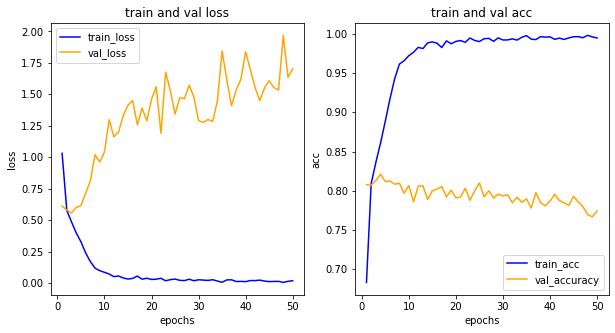

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] 

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['accuracy']
val_acc = his_dict['val_accuracy']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_accuracy')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

In [ ]:
def sentiment_predict(new_sentence):

  bos_token = [tokenizer.bos_token]
  eos_token = [tokenizer.eos_token]
  tokens = bos_token + tokenizer.tokenize(new_sentence) + eos_token
  input_id = tokenizer.convert_tokens_to_ids(tokens)
  input_id = pad_sequences([input_id], maxlen=max_seq_len, value=tokenizer.pad_token_id, padding='post')[0]
  input_id = np.array([input_id])
  score = np.argmax(model.predict(input_id)[0])
  print(score)

  if(score == 0):
    print('감기')
  elif(score == 1):
    print('폐렴')
  elif(score == 2):
    print('독감')
  elif(score == 3):
    print('과호흡')
  elif(score == 4):
    print('장염')
  elif(score == 5):
    print('대장염')
  elif(score == 6):
    print('고혈압')
  elif(score == 7):
    print('협심증')
  elif(score == 8):
    print('심근경색')
  elif(score == 9):
    print('공황장애')

In [ ]:
sentiment_predict('기침도 하고 열도 많이 나서 약을 먹었는데 일주일 넘게 증상이 계속돼요 무슨 증상인가요') ############## 폐렴

1
폐렴


In [ ]:
sentiment_predict('운동하고 난 뒤에 5분정도 가슴에 통증이 있었는데 괜찮을가요?') ############# 협심증

7
협심증


In [ ]:
sentiment_predict('가슴 뼈 안쪽이 조이는 듯한 통증이 있고 어제는 구토를 했었는데 무슨 증상인가요') # 심근경색

7
협심증


In [ ]:
sentiment_predict('호흡이 불안정하고 손이 떨리고 종종 어지러운데 왜 그럴까요?ㅠㅠ') ################ 과호흡

7
협심증


In [ ]:
sentiment_predict('갑자기 죽을 것 처럼 호흡이 가빠지고 식은땀도 나는데 왜 이러는 건가요')   # 공황장애

7
협심증


In [ ]:
sentiment_predict('저녁을 먹고 구토랑 설사를 동반한 복통이 오는데 무슨 증상인가요') ############# 장염

4
장염


In [ ]:
sentiment_predict('2주 동안 복통과 설사가 반복되고 체중도 조금 줄었는데 몇일 전부터는 혈변도 나와요 무슨 증상인가요')  # 대장염

5
대장염


In [ ]:
sentiment_predict('호흡이 가빠지고 심장이 두근거리고 가슴 쪽에 불쾌한 감정이 들면서 급격히 증상이 나빠져 죽거나 미칠지도 모르겠다는 불안이 요 며칠 수십분 지속되고 있습니다. 병원에서는 폐나 뇌에 이상이 생기지는 않았다는데 무슨 증상일까요 많이 걱정되네요,,') ############## 공황장애

8
심근경색


In [ ]:
sentiment_predict('아무 증상없다가 오늘 아침에 갑자기 가슴 뼈 안쪽에 통증이 30분 이상 지속되었는데 무슨 증상인가요') ############## 심근경색

6
고혈압


# **에포크 30**


In [ ]:
history = model.fit(train_X, train_y, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
301/301 [==============================] - 149s 254ms/step - loss: 0.9023 - accuracy: 0.7298 - val_loss: 0.5596 - val_accuracy: 0.8125
Epoch 2/30
301/301 [==============================] - 25s 82ms/step - loss: 0.5670 - accuracy: 0.8165 - val_loss: 0.5871 - val_accuracy: 0.8112
Epoch 3/30
301/301 [==============================] - 25s 84ms/step - loss: 0.4799 - accuracy: 0.8386 - val_loss: 0.5653 - val_accuracy: 0.8154
Epoch 4/30
301/301 [==============================] - 25s 83ms/step - loss: 0.3974 - accuracy: 0.8655 - val_loss: 0.6230 - val_accuracy: 0.8237
Epoch 5/30
301/301 [==============================] - 25s 83ms/step - loss: 0.3011 - accuracy: 0.8985 - val_loss: 0.6636 - val_accuracy: 0.8170
Epoch 6/30
301/301 [==============================] - 25s 83ms/step - loss: 0.2308 - accuracy: 0.9200 - val_loss: 0.7713 - val_accuracy: 0.7884
Epoch 7/30
301/301 [==============================] - 25s 83ms/step - loss: 0.1778 - accuracy: 0.9389 - val_loss: 0.7525 - val_accurac

In [ ]:
results = model.evaluate(test_X, test_y, batch_size=32)
print("test loss, test acc: ", results)

161/161 [==============================] - 10s 25ms/step - loss: 1.3318 - accuracy: 0.7902
test loss, test acc:  [1.3317674398422241, 0.7901785373687744]


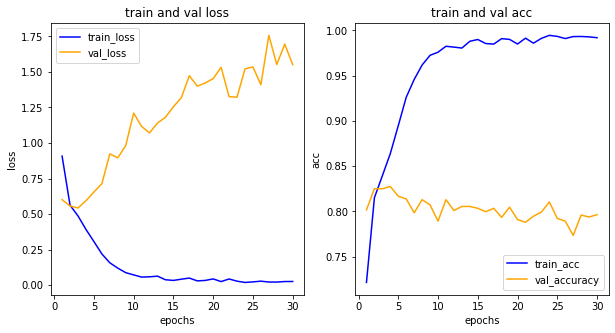

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] 

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['accuracy']
val_acc = his_dict['val_accuracy']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_accuracy')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

In [ ]:
sentiment_predict('기침도 하고 열도 많이 나서 약을 먹었는데 일주일 넘게 증상이 계속돼요 무슨 증상인가요') ############## 폐렴

1
폐렴


In [ ]:
sentiment_predict('운동하고 난 뒤에 5분정도 가슴에 통증이 있었는데 괜찮을가요?') ############# 협심증

7
협심증


In [ ]:
sentiment_predict('가슴 뼈 안쪽이 조이는 듯한 통증이 있고 어제는 구토를 했었는데 무슨 증상인가요') # 심근경색

7
협심증


In [ ]:
sentiment_predict('호흡이 불안정하고 손이 떨리고 종종 어지러운데 왜 그럴까요?ㅠㅠ') ################ 과호흡

3
과호흡


In [ ]:
sentiment_predict('갑자기 죽을 것 처럼 호흡이 가빠지고 식은땀도 나는데 왜 이러는 건가요')   # 공황장애

3
과호흡


In [ ]:
sentiment_predict('저녁을 먹고 구토랑 설사를 동반한 복통이 오는데 무슨 증상인가요') ############# 장염

4
장염


In [ ]:
sentiment_predict('2주 동안 복통과 설사가 반복되고 체중도 조금 줄었는데 몇일 전부터는 혈변도 나와요 무슨 증상인가요')  # 대장염

4
장염


In [ ]:
sentiment_predict('호흡이 가빠지고 심장이 두근거리고 가슴 쪽에 불쾌한 감정이 들면서 급격히 증상이 나빠져 죽거나 미칠지도 모르겠다는 불안이 요 며칠 수십분 지속되고 있습니다. 병원에서는 폐나 뇌에 이상이 생기지는 않았다는데 무슨 증상일까요 많이 걱정되네요,,') ############## 공황장애

8
심근경색


In [ ]:
sentiment_predict('아무 증상없다가 오늘 아침에 갑자기 가슴 뼈 안쪽에 통증이 30분 이상 지속되었는데 무슨 증상인가요') ############## 심근경색

8
심근경색


In [ ]:
sentiment_predict('가슴을 바늘로 찌르는 통증과 목에도 통증이 느껴지고 숨이 차고 두통이 있는 총체적 난국입니다 무슨 증상인가요?ㅜㅠ')  # 심근경색

8
심근경색


In [ ]:
sentiment_predict('피로감이 동반된 고열이랑 인후통이 있어요. 구토도 하고 복통도 있어요 이건 무슨 병일까요?ㅜ')  # 독감

1
폐렴


In [ ]:
sentiment_predict('열이 나고 구토하고 변에 피가 묻어 나와요 빈혈기도 있는것 같고 머선 증상이죠?')  # 대장염

5
대장염


In [ ]:
sentiment_predict('가슴이 심하게 두근거리고 식은땀이 나고 비현실적인 감각과 죽을 것 같은 두려움이 몇일동안 나타나요 왜 그러죠?') # 공황장애

9
공황장애


In [ ]:
### 독감 증상 더 해보기

In [ ]:
sentiment_predict('감기랑 증상은 비슷한데 열이 38도까지 올라가고 두통도 심하고 오한도 있고 3일정도 계속 그러네요 무슨증상인가요')  # 독감

0
감기


In [ ]:
sentiment_predict('미열이 지속되다가 갑자기 심하게 아프고 코에서 이상한 냄새도 나고 생각보다 증상이 오래 가는데 무슨 증상인가요?')   # 폐렴

1
폐렴


In [ ]:
sentiment_predict('미열이 있고 근육통도 있는데 그냥 감기일까요')   # 감기

0
감기


In [ ]:
sentiment_predict('미열이 있고 근육통도 있는데 무슨 증상인가요')   # 감기

1
폐렴


In [ ]:
sentiment_predict('딸기젤리형태의 가래가 나오는데 저 잘못되는거 아니겠죠ㅠ')  # 폐암

1
폐렴


In [ ]:
sentiment_predict('가슴을 쥐어짜는 통증이 어깨랑 목으로 퍼져나가고 숨이 찬데 무슨 증상인가요')  # 심근경색

8
심근경색


In [ ]:
sentiment_predict('갑자기 몇일전부터 몸이 피로하고 열이 38 37.8 38.1 왔다갔다하고 기침도 하는데 무슨 증상인가요')  # 독감

0
감기


In [ ]:
sentiment_predict('두통이랑 어지러움이 있는데 혈압을 쟀는데 수치는 기억이 안나요 무슨 증상인가요')  # 고혈압

6
고혈압


In [ ]:
sentiment_predict('두통이랑 어지러움이 있고 뒷목이 뻣뻣한데 무슨 증상인가요?')   # 고혈압

6
고혈압


In [ ]:
sentiment_predict('고혈압이 있는데 숨이 차고 식은땀이랑 구토, 두통이 지속돼요 가슴을 바늘로 찌르는 통증도 종종있구요 무슨 증상인가요')  # 심근경색

6
고혈압


In [ ]:
sentiment_predict('병원에서 혈압을 쟀는데 140 나왔는데 몸에 이상은 없습니다 무슨 질병인가요')  # 고혈압

6
고혈압


In [ ]:
sentiment_predict('혈압은 정상인데 두통이랑 고열이 있습니다 가래도 끓고요 무슨 증상인가요')  # 폐렴

6
고혈압


In [ ]:
sentiment_predict('당뇨가 있는데 혈변을 합니다 무슨 증상인가요')  # 대장염

5
대장염


In [ ]:
sentiment_predict('과호흡이 왔는데 몸의 압박감이랑 죽을 것 같은 느낌이 들 정도로 힘들었는데 무슨 증상인가요')  # 공황장애

3
과호흡
